# Problema 1

## a) Realizati simulari
1. random.sample(population, k, counts=None) = lista de lungime k de elemente unice alese
din populatie
2. random.choice(1.)
3. cat timp alege usa cu masina tot alegem din 1. fara alegerea jucatorului
4. se alege ultima usa daca schimba_usa true

In [90]:
import random

masina = 1
capra = 0

def MontyHall_sim(schimba_usa = False, n_sim = 1, afisare=True):
    castiguri = 0
    for _ in range(n_sim):
        won = False;
        premii = random.sample([masina, capra], 3,counts=[1,2])
        usi = {}
        for i,premiu in enumerate(premii):
            usi[i]=premiu

        alegeri = list(usi.keys())
        jucator = random.choice(alegeri)
        alegeri.remove(jucator)

        prezentator = random.choice(alegeri)
        while usi[prezentator] == 1:
            prezentator = random.choice(alegeri)
        alegeri.remove(prezentator)
        if schimba_usa:
            jucator = alegeri[0]

        if usi[jucator] == 1:
            castiguri += 1

        if afisare:
            print(usi)
            print(f"Jucator: {jucator}")
            print(f"Prezentator: {prezentator}")
            print(f"Won: {won}")
    return castiguri/n_sim

print(MontyHall_sim(schimba_usa = False, n_sim = 10000, afisare=False))
print(MontyHall_sim(schimba_usa = True, n_sim = 10000, afisare=False))


0.3412
0.6644


# Problema 2

## Histograma cu
1. hist(data, bin_edges, ...) deseneaza histograma pt frecv reletive
   - density = true (transforma valoarea in probabilitate)
   - rwidth = latime bare
   - alpha = opacitatea
2. bar(x, height, ...) deseneaza bare pt prob teoretice
   - width = latimea barelor
3. legend(loc = 'lower left') - legenda
4. grid() - adauga linii
5. show() - afiseaza

{1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666, 5: 0.16666666666666666, 6: 0.16666666666666666}


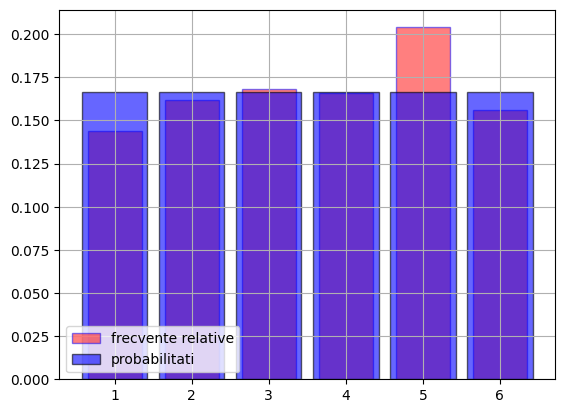

In [114]:
from random import randrange
from matplotlib.pyplot import hist,bar,legend,grid,show

data = [randrange(1,7) for _ in range(500)]
bin_edges = [k+0.5 for k in range(7)]
hist(data,bin_edges,density=True, label='frecvente relative', color='red',
     alpha=0.5, edgecolor='blue', rwidth=0.7)

distribution = dict([(i,1/6) for i in range(1,7)])
print(distribution)
bar(list(distribution.keys()),list(distribution.values()), width = 0.85, color='blue', edgecolor = 'black', alpha = 0.6, label = 'probabilitati')

legend(loc='lower left')
grid()
show()

# Problema 3

1. alegere k bile aleatoare cu returnare => random.choices(population, k)
2. 1000 de alegeri
3. binom.rvs(n,p,size) => genereaza o lista cu size alegeri de care au n incercari cu probabilitate p ca o incercare sa fie succes
4. binom.pmf(x,n,p) => genereaza probabilitatea ca suma extrasa sa fie x, suma este suma a n incercari cu probabilitate p de scucces
5. binom.cdf(x,n,p) => probabilitatea ca suma sa fie <= ca x

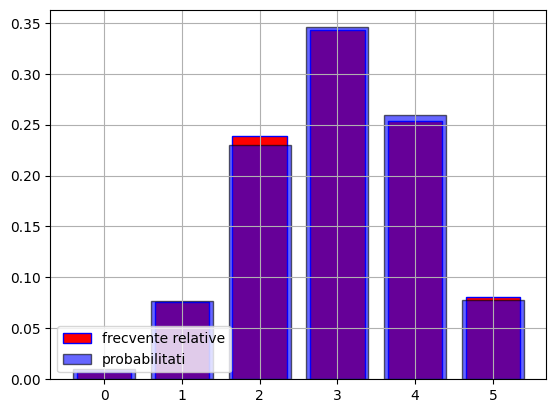

Probabilitati empirica: 0.678
Probabilitate teoretica: 0.6825599999999998


In [161]:
from scipy.stats import binom

urna = [1]*6 + [0]*4

n = 5
p = 0.6

X = binom.rvs(n,p,size=1000)

hist(X, bins = [k-0.5 for k in range(7)],
     density=True, label='frecvente relative', color='red', edgecolor='blue', rwidth=0.7)

possible_sums = [0,1,2,3,4,5]
distribution = dict([(possible_sums[i],binom.pmf(i,n,p))for i in possible_sums])
bar(list(distribution.keys()),list(distribution.values()),label = 'probabilitati',
    color = 'blue', edgecolor = 'black', alpha = 0.6)

legend(loc='lower left')
grid()
show()

prob_empirica = sum(1 for x in X if 2 < x <= 5)/1000
print(f"Probabilitati empirica: {prob_empirica}")

print(f"Probabilitate teoretica: {binom.cdf(5,n,p)-binom.cdf(2,n,p)}")